# Fashion-MNIST Project

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import matplotlib.pyplot as plt
import importlib
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.calibration import CalibratedClassifierCV
import utils
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV, train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(utils)

%matplotlib inline


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [3]:
# Combine train and test images and labels
images = np.concatenate((train_images, test_images))
labels = np.concatenate((train_labels, test_labels))
# Flatten images to 1D arrays
images = images.reshape(-1, 28*28)
# Convert images and labels to DataFrame
data = {'image_' + str(i): images[:, i] for i in range(images.shape[1])}
data['label'] = labels
df = pd.DataFrame(data)


In [4]:
df

,image_0,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,...,image_775,image_776,image_777,image_778,image_779,image_780,image_781,image_782,image_783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
69996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,1
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# Shuffle the DataFrame according to your preference
df_shuffled = df.sample(frac=1).reset_index(drop=True)


In [6]:
X = df_shuffled.drop('label', axis=1)  
y = df_shuffled['label']
X_train_, X_test, y_train_, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_, y_train_, test_size=0.1, random_state=42)

## The Labels according to their numbers in the array

Label: 0    ---> Class: T-shirt/top

Label: 1	---> Class: Trouser

Label: 2	---> Class: Pullover

Label: 3	---> Class: Dress

Label: 4	---> Class: Coat

Label: 5	---> Class: Sandal

Label: 6	---> Class: Shirt

Label: 7	---> Class: Sneaker

Label: 8	---> Class: Bag

Label: 9	---> Class: Ankle boot


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


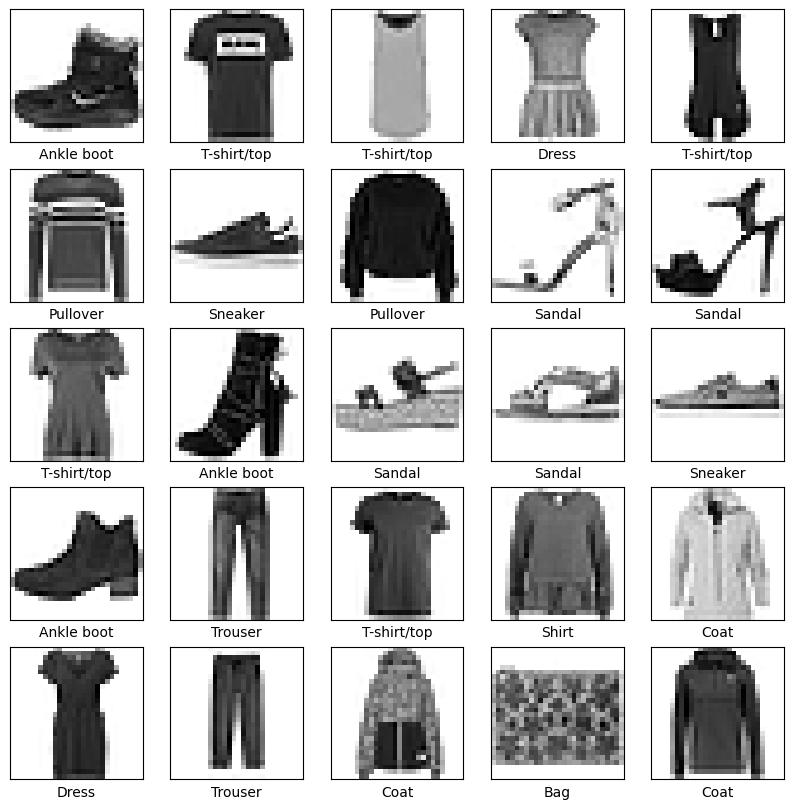

In [8]:
# Show the first 25 images

utils.plot_multi_images(train_images, train_labels, class_names)


Explore the Data

In [9]:
X_train.shape


(56700, 784)

In [10]:
len(y_train)


56700

In [11]:
X_test.shape


(7000, 784)

In [12]:
len(y_test)


7000

Preprocess the data

In [13]:
# To transform the images to be in scale from 0-1
train_images = X_train / 255.0

test_images = X_test / 255.0


Build the model

In [14]:
# print(train_images.shape)
# X_train = []
# X_test = []
# for i in range(len(train_images)):
#     temp = train_images[i].reshape(-1, 784)
#     X_train.append(temp[0])
# X_train = np.array(X_train)
# for i in range(len(test_images)):
#     temp = test_images[i].reshape(-1, 784)
#     X_test.append(temp[0])
# X_test = np.array(X_test)
# print(X_test.shape)

# y_train = train_labels.copy()
# y_test = test_labels.copy()


In [15]:
# X_train_ = X_train
# X_test_ = X_test
# y_train_ = y_train
# y_test_ = y_test

### Best K for Knn algorithm

In [16]:
best_k = 3

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
The best accuracy of the knn model is when k = 5 , and the score is: 0.8578571428571429


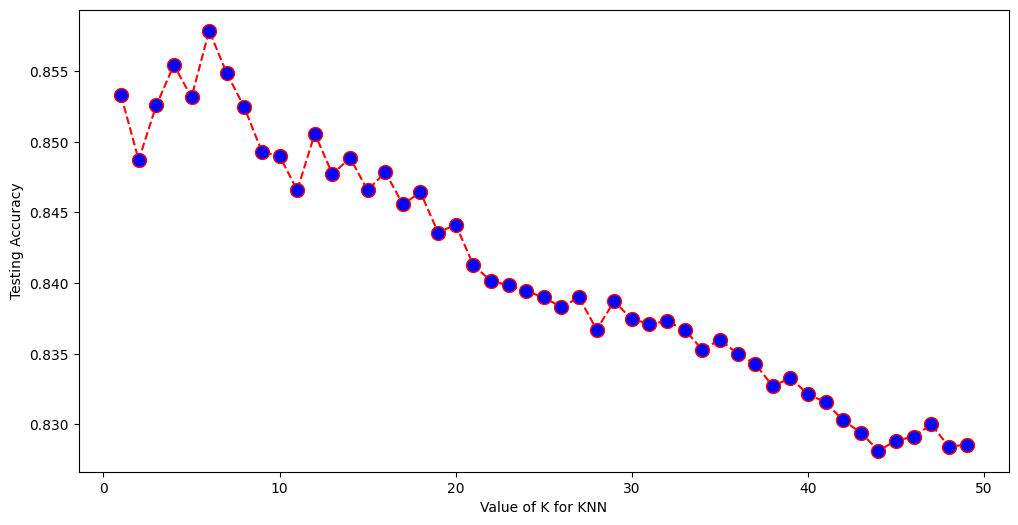

In [17]:
k_range = range(1,50)
scores = []
for k in k_range:
    print(k)
    knn_ = KNeighborsClassifier(n_neighbors=k)
    knn_.fit(X_train, y_train)
    y_pred = knn_.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 6))
plt.plot(k_range, scores,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Finding the maximum k - the number of nearest neighbors:
max_score = max(scores)
best_k = scores.index(max_score)
print("The best accuracy of the knn model is when k =",best_k, ", and the score is:",max_score) 

In [18]:
best_k

5

## Training Our Models

In [19]:
knn = KNeighborsClassifier(n_neighbors=best_k)
log_reg = LogisticRegression(max_iter=100000, random_state=42)
randomForest = RandomForestClassifier()
clf = SGDClassifier(random_state=42)
sgd_clf = CalibratedClassifierCV(clf, cv=5, method='sigmoid')
gnb = GaussianNB()

### Fit the data

In [20]:
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn.score(X_test, y_test)

0.8531428571428571

In [21]:
# MSE
knn_mse = mean_squared_error(y_test, knn_predict)
print("MSE: ", knn_mse)

# RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_test, knn_predict)))

# MAE
print("MAE: ", np.sqrt(mean_absolute_error(y_test, knn_predict)))
      
# R2 Score
print("R2 Score: ", r2_score(y_test, knn_predict))

MSE:  2.0108571428571427
RMSE:  1.418046946633694
MAE:  4.388068237521251
R2 Score:  0.7569223539881794


In [22]:
log_reg.fit(X_train, y_train)
log_reg_predict = log_reg.predict(X_test)
log_reg.score(X_test, y_test)

c:\Users\moria\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8407142857142857

In [23]:
# MSE
log_reg_mse = mean_squared_error(y_test, log_reg_predict)
print("MSE: ", log_reg_mse)

# RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_test, log_reg_predict)))

# MAE
print("MAE: ", np.sqrt(mean_absolute_error(y_test, log_reg_predict)))
      
# R2 Score
print("R2 Score: ", r2_score(y_test, log_reg_predict))

MSE:  2.085714285714286
RMSE:  1.4442002235542986
MAE:  4.466926076333542
R2 Score:  0.7478734276944743


In [24]:
randomForest.fit(X_train, y_train)
randomForest_predict = randomForest.predict(X_test)

In [25]:
# MSE
random_forest_mse = mean_squared_error(y_test, randomForest_predict)
print("MSE: ", random_forest_mse)

# RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_test, randomForest_predict)))

# MAE
print("MAE: ", np.sqrt(mean_absolute_error(y_test, randomForest_predict)))
      
# R2 Score
print("R2 Score: ", r2_score(y_test, randomForest_predict))

MSE:  1.616
RMSE:  1.2712198865656563
MAE:  4.045950356308674
R2 Score:  0.8046537132931433


In [26]:
sgd_clf.fit(X_train, y_train)
sgd_clf_predict = sgd_clf.predict(X_test)

In [27]:
# MSE
sgd_clf_mse = mean_squared_error(y_test, sgd_clf_predict)
print("MSE: ", sgd_clf_mse)

# RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_test, sgd_clf_predict)))

# MAE
print("MAE: ", np.sqrt(mean_absolute_error(y_test, sgd_clf_predict)))
      
# R2 Score
print("R2 Score: ", r2_score(y_test, sgd_clf_predict))

MSE:  2.322142857142857
RMSE:  1.5238578861373056
MAE:  4.684335598566781
R2 Score:  0.7192933265187451


In [28]:
gnb.fit(X_train, y_train)
gnb_predict = gnb.predict(X_test)
gnb.score(X_test, y_test)

0.5922857142857143

In [29]:
# MSE
gnb_mse = mean_squared_error(y_test, gnb_predict)
print("MSE: ", gnb_mse)

# RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_test, gnb_predict)))

# MAE
print("MAE: ", np.sqrt(mean_absolute_error(y_test, gnb_predict)))
      
# R2 Score
print("R2 Score: ", r2_score(y_test, gnb_predict))

MSE:  3.180285714285714
RMSE:  1.7833355585210862
MAE:  7.360725895880495
R2 Score:  0.6155587840639991


### Adding the neural network